In [1]:
# if you want to use omicverse in windows please remember install annoy with https://anaconda.org/conda-forge/python-annoy
import omicverse as ov
import scanpy as sc
import scvelo as scv

ov.utils.ov_plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.6, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
adata = ov.read('Integrate/follicle_annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 166774 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden_1.0', 'leiden_1.2', 'leiden_1.5', 'annotation', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'highly_variable-AAV', 'means-AAV', 'dispersions-AAV', 'dispersions_norm-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR', 'highly_variable-CTR', 'means-CTR', 'dispersions-CTR', 'dispersions_norm-CTR'
    uns: 'annotation_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [3]:
# we need the log data
adata.X.max()

5.226223

In [4]:
adata.layers["lognorm"] = adata.X.copy()

In [5]:
pre_an_adata=adata[adata.obs['annotation'].isin(['Antral'])]
dds=ov.bulk.pyDEG(pre_an_adata.to_df(layer='lognorm').T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [6]:
pre_an_adata.obs.annotation.value_counts()

annotation
Antral    118056
Name: count, dtype: int64

In [8]:
pre_an_adata

View of AnnData object with n_obs × n_vars = 118056 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden_1.0', 'leiden_1.2', 'leiden_1.5', 'annotation', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'highly_variable-AAV', 'means-AAV', 'dispersions-AAV', 'dispersions_norm-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR', 'highly_variable-CTR', 'means-CTR', 'dispersions-CTR', 'dispersions_norm-CTR'
    uns: 'annotation_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'lognorm'

In [10]:
pre_an_adata.uns['batch_colors'] = ['#DFDFDF','#F29A9D']

图表已保存为 figures/enpp2_aav.pdf


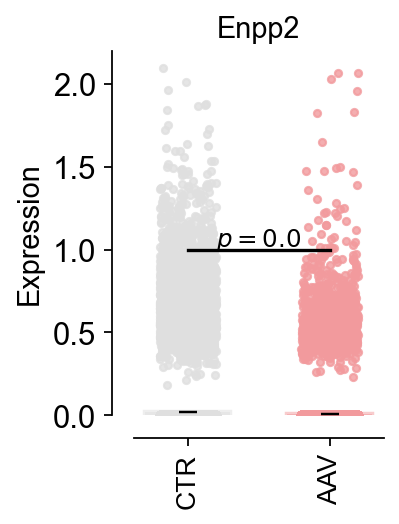

In [13]:
import matplotlib.pyplot as plt
# 需要改成CTR是灰色#DFDFDF，AAV组是粉红色#F29A9D
fig, ax = plt.subplots(figsize=(2,3))
ov.pl.bardotplot(pre_an_adata,groupby='batch',color='Enpp2',figsize=(2,2),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=1,
          text_y=0.02,
          text='$p={}$'.format(round(0.0000001,5)),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center')

# 保存图表为 PDF 文件
pdf_file_path = 'figures/enpp2_aav.pdf'
plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')
print(f'图表已保存为 {pdf_file_path}')

# 显示图表
plt.show()

In [7]:
treatment_groups=pre_an_adata.obs[pre_an_adata.obs['batch']=='AAV'].index.tolist()
control_groups=pre_an_adata.obs[pre_an_adata.obs['batch']=='CTR'].index.tolist()
dds.deg_analysis(treatment_groups,control_groups,method='ttest')

,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
Star,1.182616e-207,5.250288e-207,1.066508,2.897826,2.807471,1.489271,0.092894,0.092894,0.106651,206.927156,206.279817,sig
Cyp11a1,2.088038e-167,8.113338e-167,1.076208,2.453016,2.366165,1.242550,0.105957,0.105957,0.107621,166.680262,166.090800,sig
Fdx1,0.000000e+00,0.000000e+00,1.121173,2.392454,2.263169,1.178344,0.165009,0.165009,0.112117,inf,inf,sig
Inha,0.000000e+00,0.000000e+00,1.230943,2.159571,1.956987,0.968634,0.299764,0.299764,0.123094,inf,inf,sig
mt-Cytb,0.000000e+00,0.000000e+00,0.930073,1.895098,1.828839,0.870928,-0.104584,0.104584,0.093007,inf,inf,sig
...,...,...,...,...,...,...,...,...,...,...,...,...
Klk1b21,8.273472e-01,8.722919e-01,1.280319,0.000009,0.000007,-17.032267,0.356503,0.356503,0.128032,0.082312,0.059338,normal
Zfp985,2.435958e-01,3.193927e-01,5.378502,0.000008,0.000004,-17.961290,2.427204,2.427204,0.537850,0.613330,0.495675,normal
Insl3,3.911138e-01,4.809519e-01,0.257339,0.000005,0.000003,-18.562695,-1.958258,1.958258,0.025734,0.407697,0.317898,normal
Prpmp5,3.911128e-01,4.809519e-01,0.329426,0.000004,0.000002,-19.066286,-1.601973,1.601973,0.032943,0.407698,0.317898,normal


In [ ]:
df.write

In [12]:
df = dds.deg_analysis(treatment_groups,control_groups,method='ttest')
# 查找基因为 'Gpnmb' 或 'Enpp2' 的行
result = df[df.index.isin(['Gpnmb', 'Enpp2'])]

# 显示结果
result

,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
Enpp2,1.289054e-26,2.696826e-26,0.661463,0.019088,0.015857,-5.978767,-0.596267,0.596267,0.066146,25.889729,25.569147,sig
Gpnmb,1.124304e-02,1.723071e-02,0.861830,0.008541,0.007950,-6.974763,-0.214524,0.214524,0.086183,1.949116,1.763697,sig


In [18]:
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=100)

... Fold change threshold: 0.9559317827224731


<AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

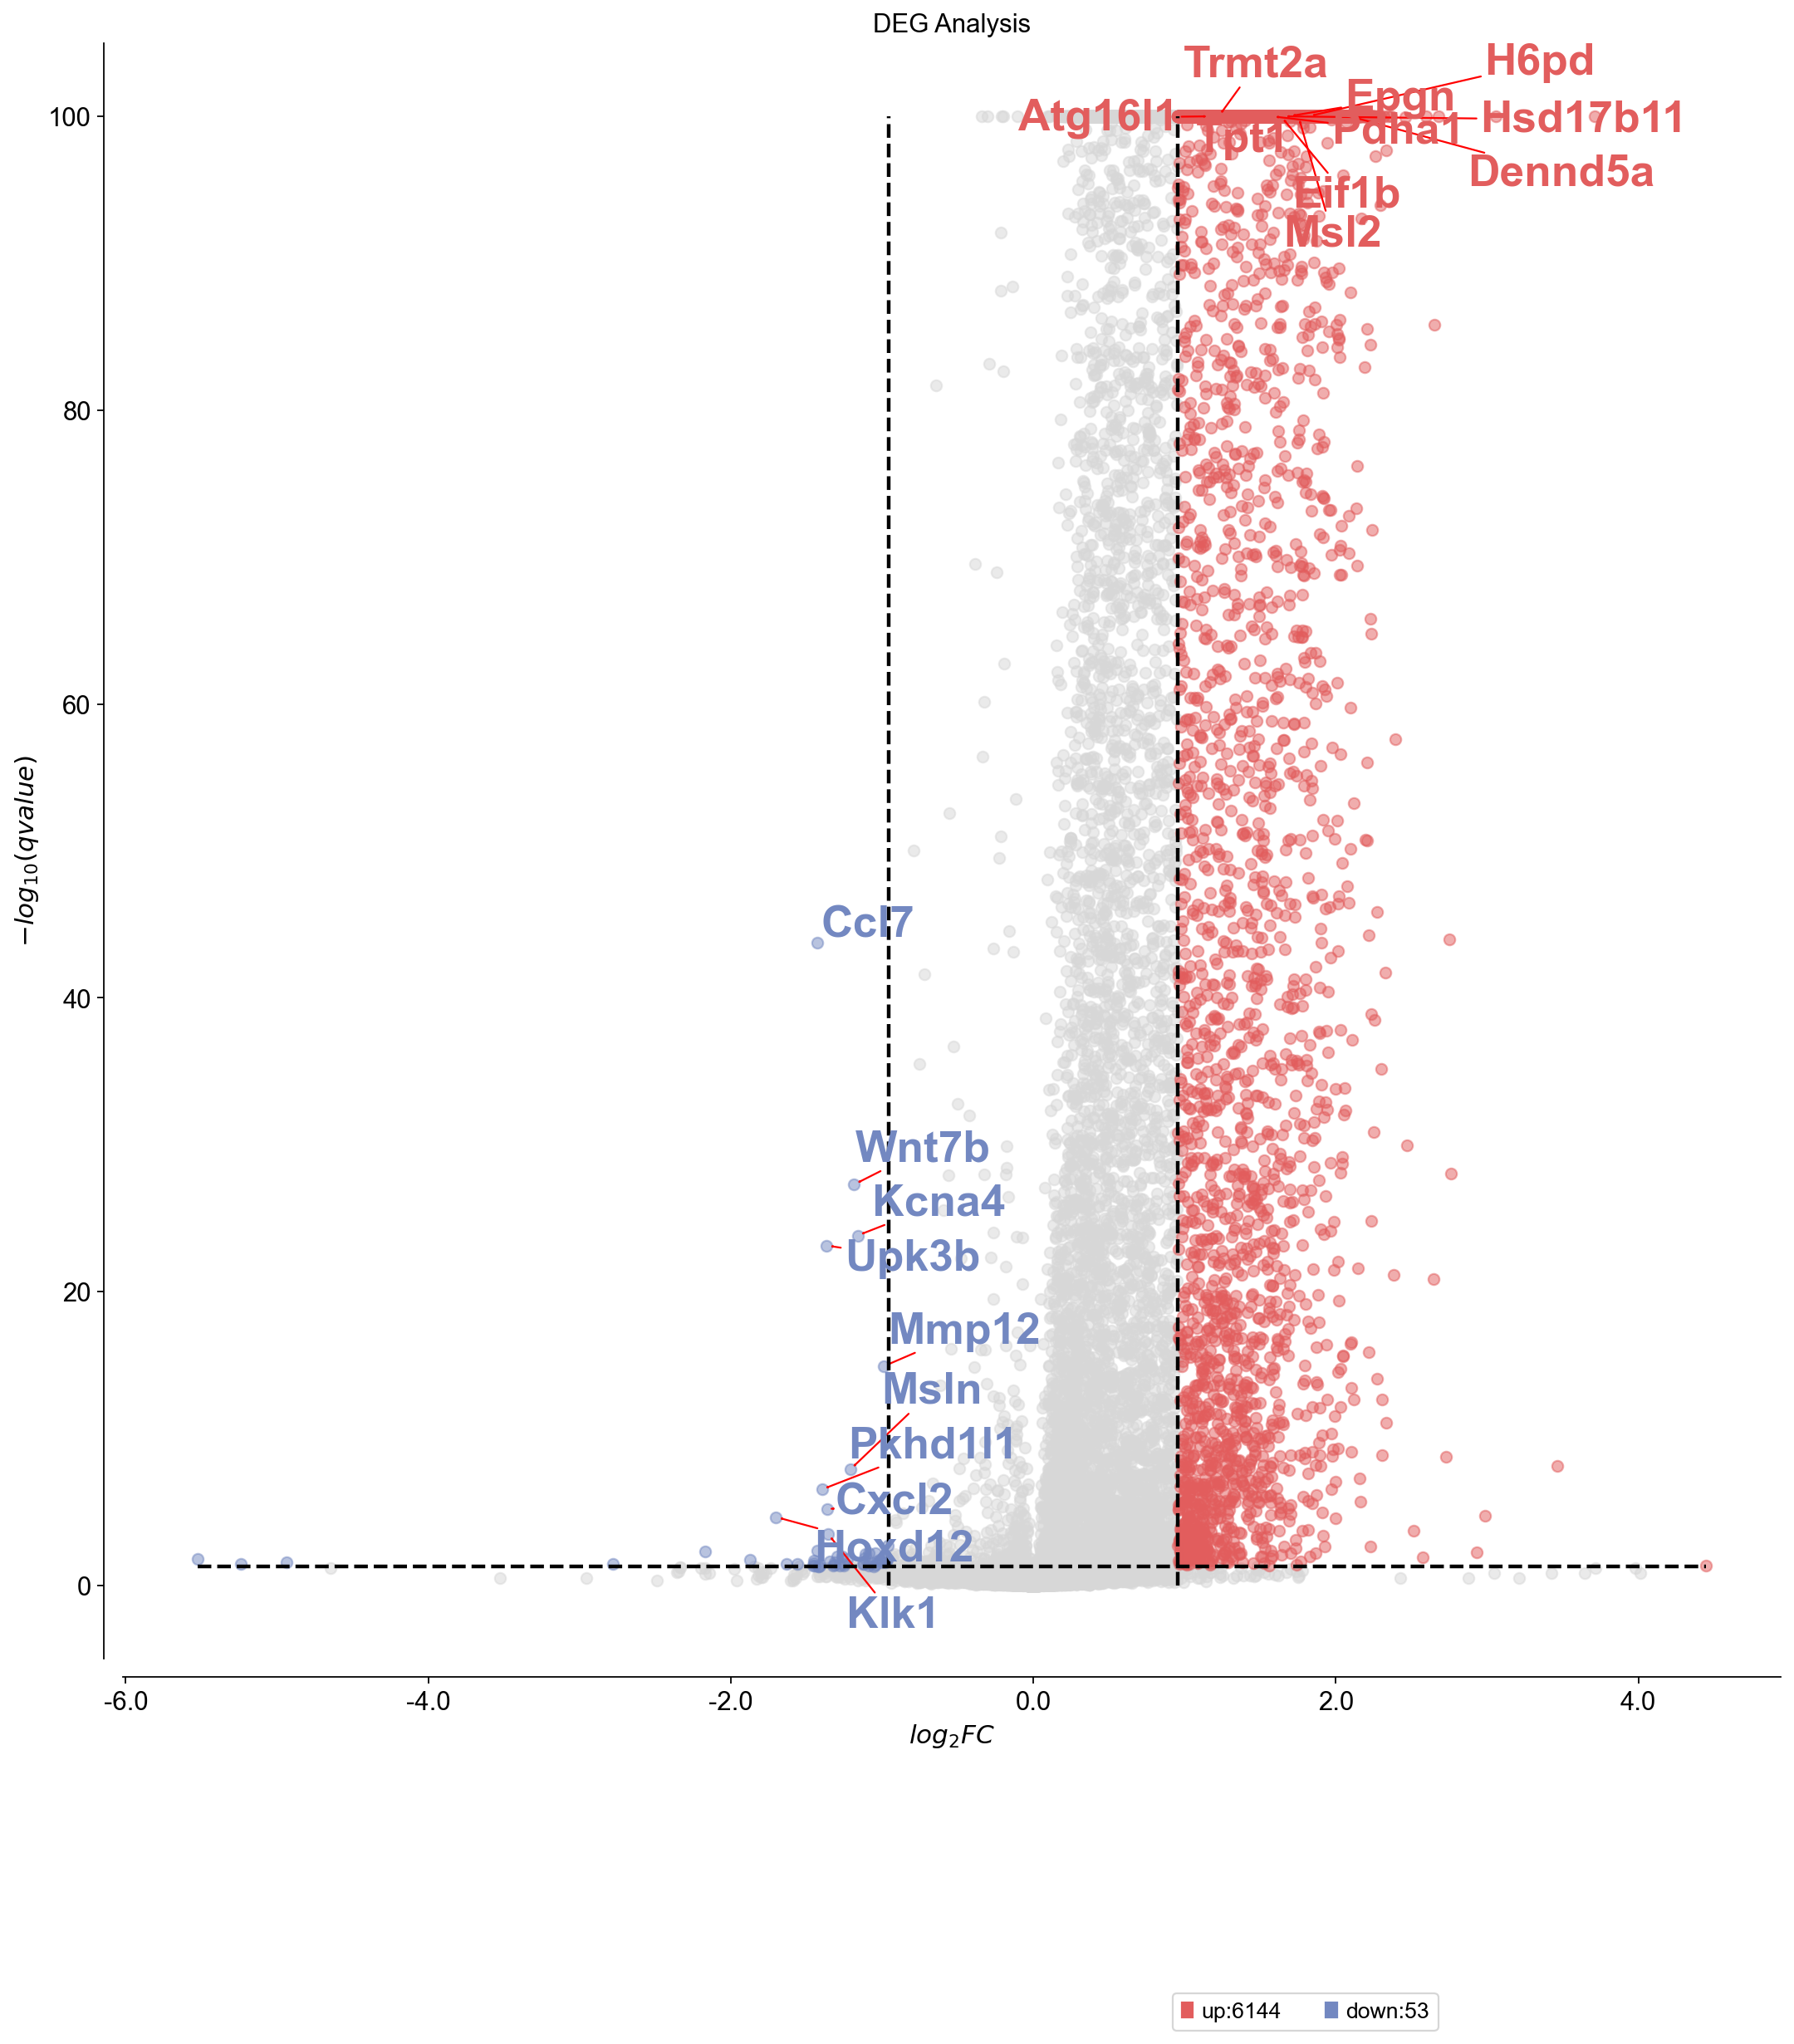

In [21]:
dds.plot_volcano(title='DEG Analysis',figsize=(16,16),
                 plot_genes_num=20,plot_genes_fontsize=24,)

(<Figure size 160x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Gene Expression'}>)

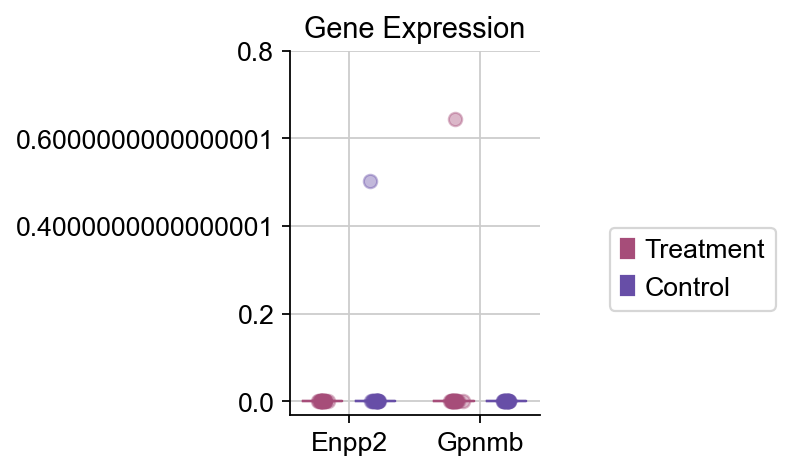

In [20]:
dds.plot_boxplot(genes=['Gpnmb','Enpp2'],treatment_groups=treatment_groups,
                control_groups=control_groups,figsize=(2,3),fontsize=12,
                 legend_bbox=(2,0.55))

In [22]:
pre_an_adata=adata[~adata.obs['annotation'].isin(['Atretic'])]
dds=ov.bulk.pyDEG(pre_an_adata.to_df(layer='lognorm').T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [23]:
pre_an_adata.obs.annotation.value_counts()

annotation
Antral       118056
Preantral     14690
Name: count, dtype: int64

In [24]:
treatment_groups=pre_an_adata.obs[pre_an_adata.obs['annotation']=='Antral'].index.tolist()
control_groups=pre_an_adata.obs[pre_an_adata.obs['annotation']=='Preantral'].index.tolist()
dds.deg_analysis(treatment_groups,control_groups,method='ttest')

,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
Star,0.000000,0.000000,1.572844,2.761150,2.258332,1.175258,0.653375,0.653375,0.157284,inf,inf,sig
Cyp11a1,0.000000,0.000000,1.817966,2.318381,1.796821,0.845446,0.862325,0.862325,0.181797,inf,inf,sig
Fdx1,0.000000,0.000000,1.912037,2.210556,1.683341,0.751327,0.935110,0.935110,0.191204,inf,inf,sig
Inha,0.000296,0.000504,1.019760,1.924376,1.905731,0.930344,0.028230,0.028230,0.101976,3.529209,3.297629,sig
mt-Cytb,0.432831,0.519414,0.997914,1.838665,1.836747,0.877153,-0.003012,0.003012,0.099791,0.363682,0.284487,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
Tcp10c,0.005435,0.008670,0.033799,0.000029,0.000015,-16.061255,-4.886859,4.886859,0.003380,2.264794,2.061964,sig
Klk1b21,0.610955,0.688093,7.942429,0.000007,0.000004,-18.103067,2.989580,2.989580,0.794243,0.213991,0.162353,normal
Zfp985,0.087002,0.123864,0.163598,0.000025,0.000014,-16.111042,-2.611776,2.611776,0.016360,1.060470,0.907055,normal
Ssxb1,0.005435,0.008670,0.039723,0.000025,0.000012,-16.303101,-4.653886,4.653886,0.003972,2.264769,2.061964,sig


In [25]:
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=100)

... Fold change threshold: 1.193098545074463


<AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

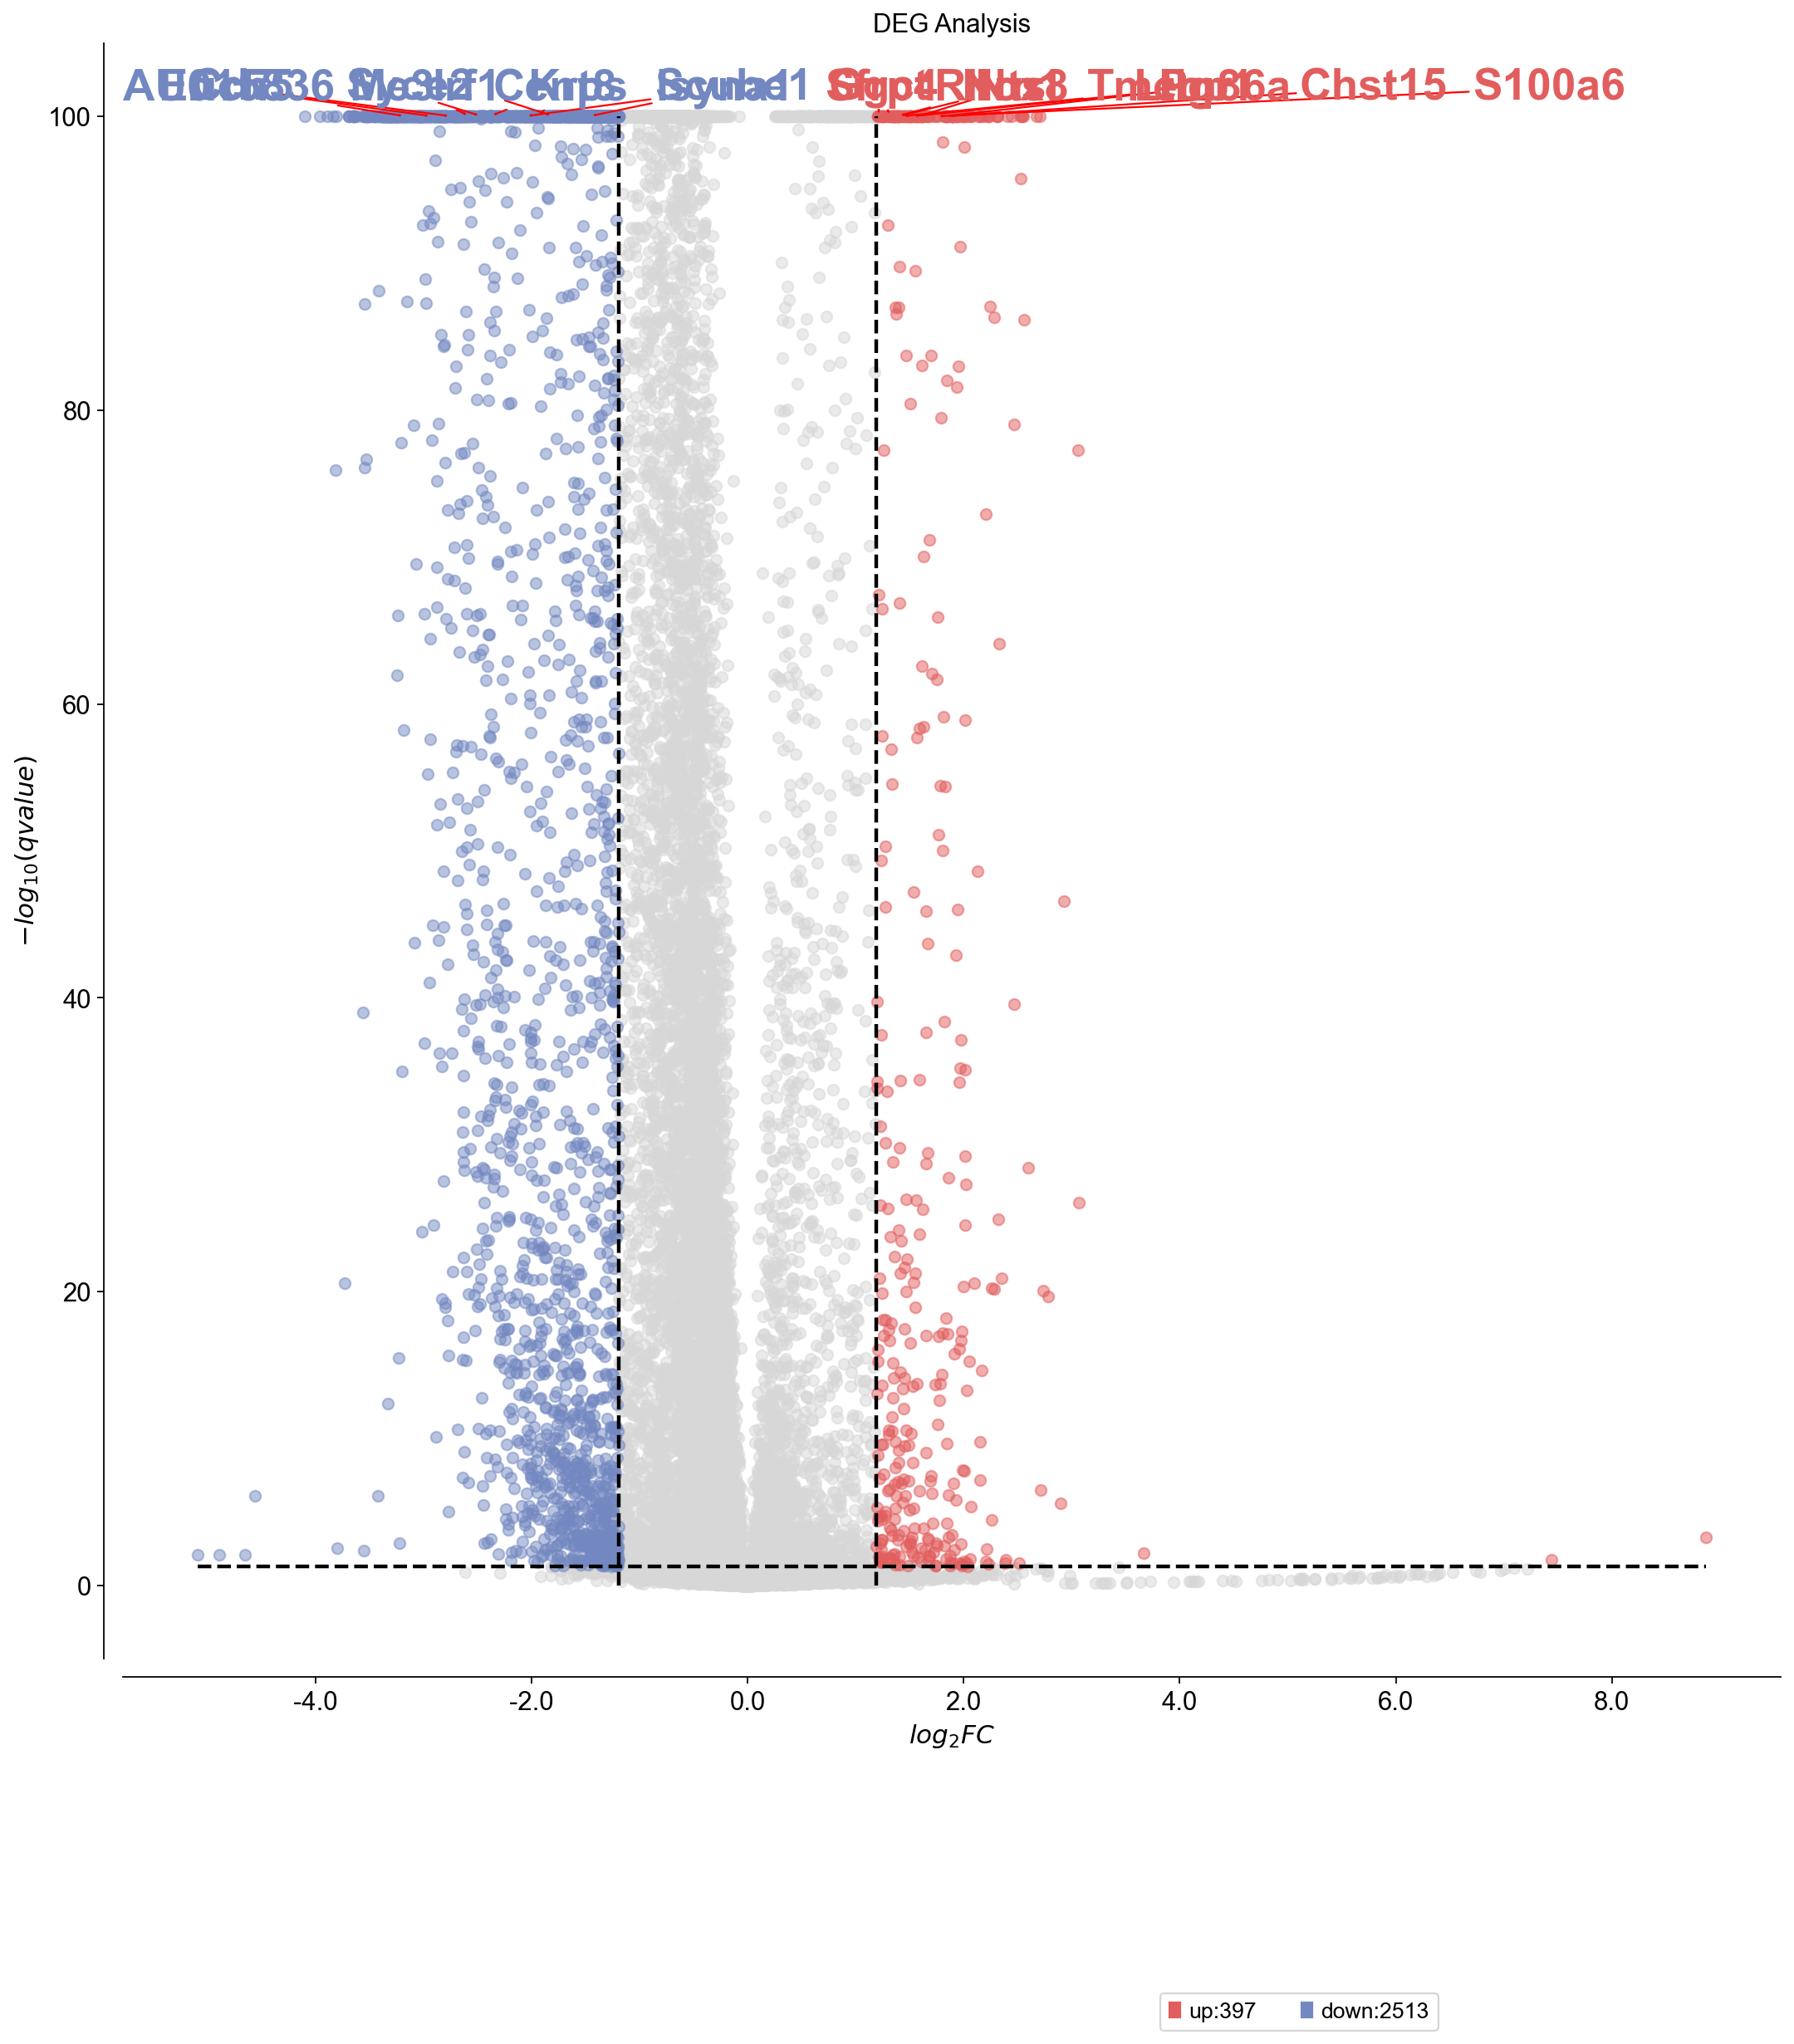

In [26]:
dds.plot_volcano(title='DEG Analysis',figsize=(16,16),    
                 plot_genes_num=20,plot_genes_fontsize=24,)

(<Figure size 160x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Gene Expression'}>)

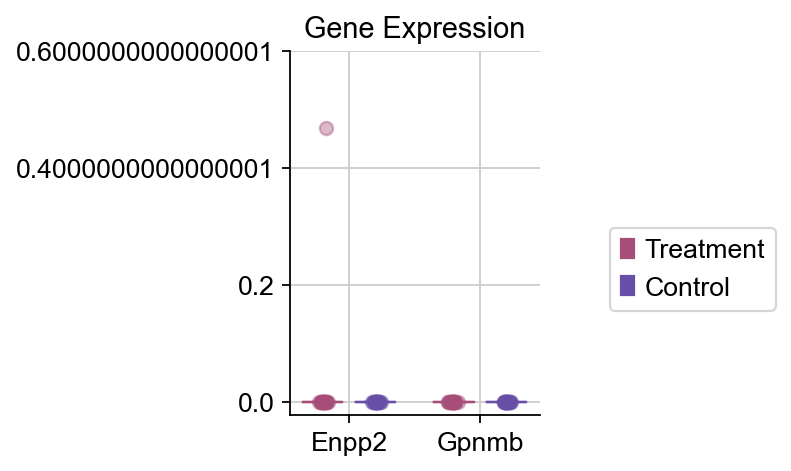

In [27]:
dds.plot_boxplot(genes=['Gpnmb','Enpp2'],treatment_groups=treatment_groups,
                control_groups=control_groups,figsize=(2,3),fontsize=12,
                 legend_bbox=(2,0.55))